# Question 1

In [103]:
import numpy as np
# Length and width of a newborn's skull
data = [191, 155, 195, 149, 181, 148, 183, 153, 176, 144, 208, 157, 189, 150,
197, 159, 188, 152, 192, 150, 179, 158, 183, 147, 174, 150, 190, 159, 188,
151, 163, 137, 195, 155, 186, 153, 181, 145, 175, 140, 192, 154, 174, 143,
176, 139, 197, 167, 190, 163]
x1 = [data[i] for i in range(0,len(data),2)]
x2 = [data[i] for i in range(1,len(data),2)]

# Q1.a 

The data needs to be scaled since the variance of both features is relatively high (far from 1...)

In [104]:
# convert to numpy array 
xn1, xn2 = np.expand_dims(np.asarray(x1), axis=1), np.expand_dims(np.asarray(x2), axis=1)
# concatenate 
data = np.concatenate([xn1, xn2], axis=1)
# so we have the width and length ready
print(data.shape)

(25, 2)


In [105]:
data_avg = np.mean(data, axis=0)
data_zero_mean = data - data_avg
X = data_zero_mean / np.std(data_zero_mean, axis=0)

In [106]:
X.shape, np.mean(X, axis=0), np.std(X, axis=0) # the data is centered and scaled

((25, 2), array([ 1.31006317e-16, -6.48370246e-16]), array([1., 1.]))

# Q1.b

In [107]:
# TODO: calculate covariance manually
cov_manual = np.zeros(shape=(2, 2))

cov_manual[0][0] = (X[:, [0]].T @ X[:, [0]]).item() / len(X)
cov_manual[0][1] = (X[:, [0]].T @ X[:, [1]]).item() / len(X)
cov_manual[1][1] = (X[:, [1]]. T@ X[:, [1]]).item() / len(X)
cov_manual[1][0] = cov_manual[0][1]

In [108]:
cov_matrix = (X.T @ X) / len(X)
# method 3
cov_numpy = np.cov(X, rowvar=False)

In [109]:
np.mean(np.abs(cov_matrix- cov_numpy)), np.mean(np.abs(cov_matrix- cov_manual)), np.mean(np.abs(cov_manual - cov_numpy))

(0.036136573666829985, 1.1102230246251565e-16, 0.03613657366682993)

# Q1.c

In [110]:
import numpy.linalg as la
eig_res = la.eig(cov_matrix)

In [111]:
r1, r2 = eig_res
eig_res = [(v, e) for v, e in zip(r1, r2)]
eig_res

[(0.26544446399215804, array([-0.70710678, -0.70710678])),
 (1.7345555360078417, array([ 0.70710678, -0.70710678]))]

In [112]:
r1, r2 = sorted(eig_res, key=lambda x: x[0], reverse=True)

In [113]:
eigv, eigvec = [r1[0], r2[0]], [r1[1], r2[1]]
eigv, eigvec

([1.7345555360078417, 0.26544446399215804],
 [array([ 0.70710678, -0.70710678]), array([-0.70710678, -0.70710678])])

In [114]:
for i, v in enumerate(eigv):    
	print(f"The variance explained by the eigen value number: {i + 1}: {round(v / np.sum(eigv).item(), 4)}")

The variance explained by the eigen value number: 1: 0.8673
The variance explained by the eigen value number: 2: 0.1327


In [115]:
eigvectors_concatenated = np.concatenate([eigvec], axis=0)
eigvectors_concatenated.shape

(2, 2)

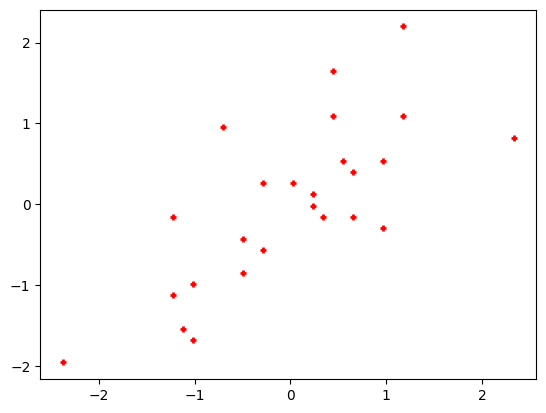

In [116]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], s = 20, c = 'red', marker = '+', linewidth = 2)
plt.show()

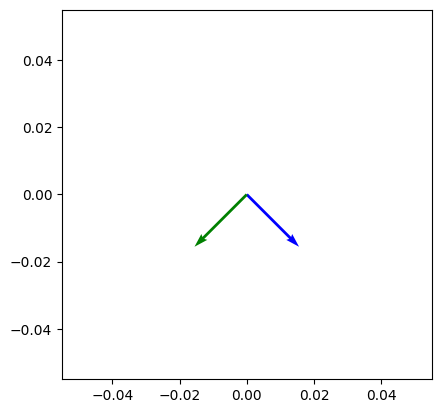

In [117]:
# • Draw a straight line y = ax + b with the abline(a,b) command.
def abline(slope, intercept):
	axes = plt.gca()
	x_vals = np.array(axes.get_xlim())
	y_vals = intercept + slope * x_vals
	plt.plot(x_vals, y_vals, '--')

ax = plt.gca()
ax.set_aspect(1)

origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, eigvectors_concatenated[:, 0], eigvectors_concatenated[:, 1], color=['b','g'], scale=5)

# Q1.f

In [118]:
X1_X0 = np.concatenate([np.ones(shape=(len(X), 1)), X[:, [0]]], axis=1)
print(X1_X0[:10, :])
X2 = X[:, [1]]

[[ 1.          0.55203555]
 [ 1.          0.9702443 ]
 [ 1.         -0.49348633]
 [ 1.         -0.28438195]
 [ 1.         -1.01624726]
 [ 1.          2.32942274]
 [ 1.          0.34293118]
 [ 1.          1.17934868]
 [ 1.          0.23837899]
 [ 1.          0.65658774]]


In [119]:
# solve the least squares problems
least_sqr_sol = la.lstsq(X1_X0, X2, rcond=-1)
least_sqr_sol[0]

array([[-6.21724894e-16],
       [ 7.34555536e-01]])

# Q2

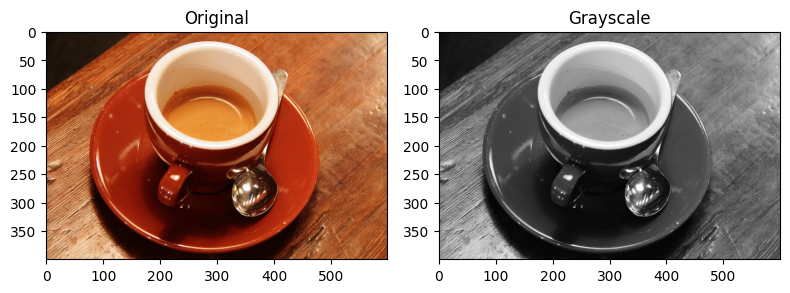

In [120]:
# Import useful modules
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage import data
images = (
'astronaut',
'binary_blobs',
'brick',
'colorwheel',
'camera',
'cat',
'checkerboard',
'clock',
'coffee',
'coins',
'eagle',
'grass',
'gravel',
'horse',
'logo',
'page',
'text',
'rocket',
)
# We select the "coffee" image
caller = getattr(data, 'coffee')
original = caller()
# Then we convert it in grayscale
grayscale = rgb2gray(original)
# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
fig.tight_layout()
plt.show()

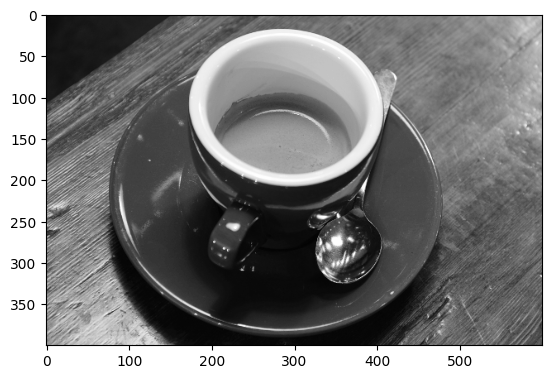

In [121]:
A = np.matrix(grayscale)
plt.imshow(A, cmap=plt.cm.gray)

In [122]:
U, S , Vt = la.svd(A)

In [123]:
def add_zeros(s, full_length: int) -> np.ndarray:
	sd = np.diag(s)
	return np.concatenate([sd, np.zeros((full_length - sd.shape[0], sd.shape[1]))], axis=0)

In [124]:
add_zeros(np.asarray([1, 2, 3, 4]), 10)

array([[1., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 3., 0.],
       [0., 0., 0., 4.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [125]:
def reconstruct_matrix(u:np.ndarray, s:np.ndarray, vt: np.ndarray, k: int):
	vtk = vt[:k, :]
	sk = add_zeros(s[:k], len(u))
	return u @ sk @ vtk

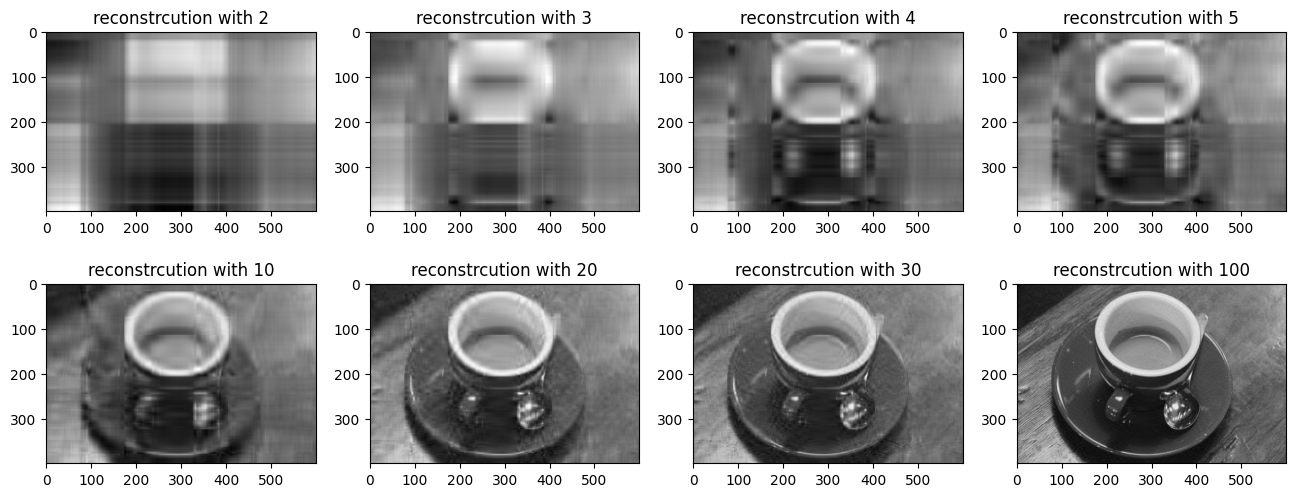

In [126]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
for i, k in enumerate([2, 3, 4, 5, 10, 20, 30, 100]):
	row, col = i // 4, i % 4
	im_k = reconstruct_matrix(U, S, Vt, k)
	ax[row, col].imshow(im_k,cmap=plt.cm.gray)
	ax[row, col].set_title(f"reconstrcution with {k}")
plt.show()

# Q2.e
The reconstruction is good enough from k = 30

In [127]:
S[:10], np.sum(S), np.cumsum(S)[:3]

(array([198.84725221,  66.07361879,  33.99374129,  26.47562959,
         20.87413525,  18.17880932,  15.50342406,  13.89675521,
         12.31018933,  11.88140476]),
 929.8871264657084,
 array([198.84725221, 264.920871  , 298.91461229]))

In [128]:
total_sum = np.sum(S)
cum_sums = np.cumsum(S) / total_sum

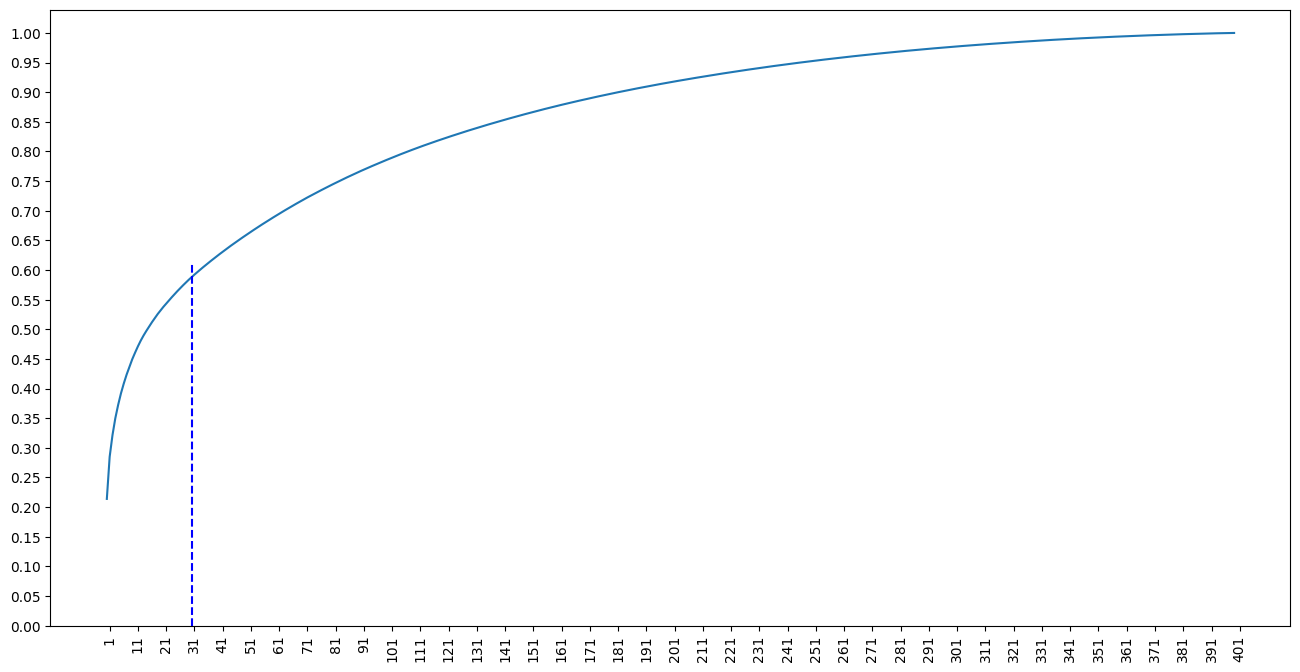

In [129]:
plt.figure(figsize=(16, 8))
plt.plot(list(range(len(S))), cum_sums)
plt.xticks(np.linspace(1, len(S) + 1,41), rotation=90)
plt.yticks(np.linspace(0, 1, 21))
plt.axvline(x=30, ymin=0, ymax=cum_sums[30], color='b', ls='--', lw=1.5, label='axvline - % of full height')
plt.show()

with $k = 30$ the ratio is at around $60\%$ which is visually good enough. 

In [130]:
def compression_ratio(org_img: np.ndarray, u:np.ndarray, s:np.ndarray, vt: np.ndarray, k: int):
	vtk = vt[:k, :]
	total = np.prod(org_img.shape)
	# total = np.sum(U.shape) + np.sum(s.shape) + np.sum(vt.shape)
	compressed = np.prod(U.shape) + k + np.prod(vtk.shape)

	# total = np.sum(U.shape) + np.sum(s.shape) + np.sum(vt.shape)
	# compressed = np.sum(U.shape) + np.sum(sk.shape) + np.sum(vtk.shape)
	return compressed / total

In [133]:
for i, k in enumerate([2, 3, 4, 5, 10, 20, 30, 100]):
    print(f"compression ratio for k = {k} : {round(compression_ratio(A, U, S, Vt, k), 4)}")

compression ratio for k = 2 : 0.6717
compression ratio for k = 3 : 0.6742
compression ratio for k = 4 : 0.6767
compression ratio for k = 5 : 0.6792
compression ratio for k = 10 : 0.6917
compression ratio for k = 20 : 0.7168
compression ratio for k = 30 : 0.7418
compression ratio for k = 100 : 0.9171
